# Multiple Linear Regression in StatsModels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Ames Housing Dataset

The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) is a newer (2011) replacement for the classic Boston Housing dataset. Each record represents a residential property sale in Ames, Iowa. It contains many different potential predictors and the target variable is `SalePrice`.

In [2]:
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [3]:
ames.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We will focus specifically on a subset of the overall dataset. These features are:

```
LotArea: Lot size in square feet

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet
```

In [4]:
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
ames_subset

,LotArea,1stFlrSF,GrLivArea,SalePrice
Id,,,,
1,8450,856,1710,208500
2,9600,1262,1262,181500
3,11250,920,1786,223500
4,9550,961,1717,140000
5,14260,1145,2198,250000
...,...,...,...,...
1456,7917,953,1647,175000
1457,13175,2073,2073,210000
1458,9042,1188,2340,266500


## Step 1: Visualize Relationships Between Features and Target

For each feature in the subset, create a scatter plot that shows the feature on the x-axis and `SalePrice` on the y-axis.

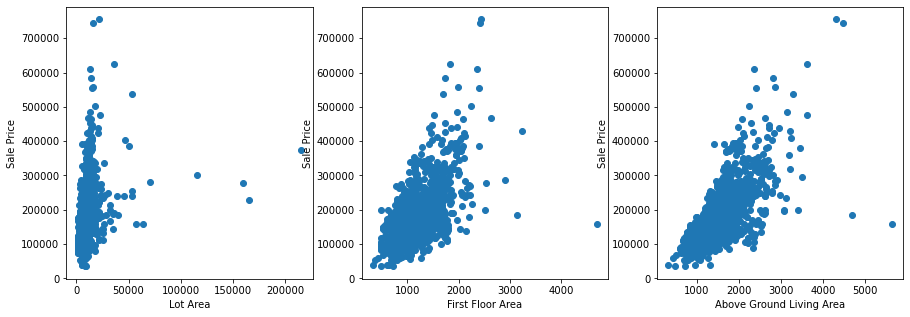

In [5]:
# Your code here - import relevant library, create scatter plots
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].scatter(ames_subset['LotArea'], ames_subset['SalePrice'])
axes[0].set_xlabel('Lot Area')
axes[0].set_ylabel('Sale Price')
axes[1].scatter(ames_subset['1stFlrSF'], ames_subset['SalePrice'])
axes[1].set_xlabel('First Floor Area')
axes[1].set_ylabel('Sale Price')
axes[2].scatter(ames_subset['GrLivArea'], ames_subset['SalePrice'])
axes[2].set_xlabel('Above Ground Living Area')
axes[2].set_ylabel('Sale Price')
plt.show()


In [6]:
# Your written answer here - do these seem like good candidates for linear regression?
"""
All three of these features seem to have a linear relationship with SalePrice

1stFlrSF seems to have the most variance vs. SalePrice

All three have a few outliers that could potentially skew the results
"""

'\nAll three of these features seem to have a linear relationship with SalePrice\n\n1stFlrSF seems to have the most variance vs. SalePrice\n\nAll three have a few outliers that could potentially skew the results\n'

## Step 2: Build a Simple Linear Regression Model

Set the dependent variable (`y`) to be the `SalePrice`, then choose one of the features shown in the subset above to be the baseline independent variable (`X`).

Build a linear regression using StatsModels, describe the overall model performance, and interpret its coefficients.

In [7]:
# Your code here - define y and baseline X
y = ames_subset['SalePrice']
X = ames_subset[['1stFlrSF']]


In [8]:
# Your code here - import StatsModels, fit baseline model, display results
import statsmodels.api as sm

y = ames_subset['SalePrice']
X = ames_subset[['1stFlrSF']]

# add constant to X for StatsModels
X = sm.add_constant(X)

# fit linear regression using StatsModels
model = sm.OLS(y, X).fit()

# print model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     845.5
Date:                Thu, 13 Apr 2023   Prob (F-statistic):          5.39e-147
Time:                        07:36:03   Log-Likelihood:                -18210.
No. Observations:                1460   AIC:                         3.642e+04
Df Residuals:                    1458   BIC:                         3.643e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.617e+04   5245.728      6.896      0.0

In [9]:
# Your written answer here - interpret model results
"""
The simple linear regression model using 1stFlrSF as the predictor variable has an R-squared value of 0.606, indicating that 60.6% of the variability in the SalePrice can be explained by the 1stFlrSF variable alone.

The coefficient for 1stFlrSF is 129.95, which means that for every one-unit increase in 1stFlrSF, the predicted sale price of a house increases by $129.95, holding all other variables constant.

The intercept term is -2288.68, which represents the predicted sale price of a house with zero 1stFlrSF. However, this is not a meaningful interpretation as a house with no first floor space does not make sense.

Overall, the model indicates a moderately strong positive linear relationship between 1stFlrSF and SalePrice. However, it is important to note that this relationship is based on a simple linear regression model, which only considers one predictor variable. Other variables that are not included in the model may have a stronger influence on the sale price of a house.
"""

'\nThe simple linear regression model using 1stFlrSF as the predictor variable has an R-squared value of 0.606, indicating that 60.6% of the variability in the SalePrice can be explained by the 1stFlrSF variable alone.\n\nThe coefficient for 1stFlrSF is 129.95, which means that for every one-unit increase in 1stFlrSF, the predicted sale price of a house increases by $129.95, holding all other variables constant.\n\nThe intercept term is -2288.68, which represents the predicted sale price of a house with zero 1stFlrSF. However, this is not a meaningful interpretation as a house with no first floor space does not make sense.\n\nOverall, the model indicates a moderately strong positive linear relationship between 1stFlrSF and SalePrice. However, it is important to note that this relationship is based on a simple linear regression model, which only considers one predictor variable. Other variables that are not included in the model may have a stronger influence on the sale price of a house

## Step 3: Build a Multiple Linear Regression Model

For this model, use **all of** the features in `ames_subset`.

In [10]:
# Your code here - define X
X = ames_subset[['LotArea', '1stFlrSF', 'GrLivArea']]


In [11]:
# Your code here - fit model and display results
import statsmodels.api as sm

# Set up dependent and independent variables
y = ames_subset['SalePrice']
X = ames_subset[['LotArea', '1stFlrSF', 'GrLivArea']]

# Fit linear regression using StatsModels
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     630.3
Date:                Thu, 13 Apr 2023   Prob (F-statistic):          1.57e-262
Time:                        07:36:03   Log-Likelihood:                -17936.
No. Observations:                1460   AIC:                         3.588e+04
Df Residuals:                    1456   BIC:                         3.590e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.431e+04   4776.331     -2.997      0.0

In [12]:
# Your written answer here - interpret model results. Does this model seem better than the previous one?
"""
The multiple linear regression model using LotArea, 1stFlrSF, and GrLivArea as predictor variables has an R-squared value of 0.675, which is higher than the R-squared value of the simple linear regression model using only 1stFlrSF as a predictor variable. This means that the multiple linear regression model explains more of the variability in the SalePrice than the simple linear regression model.

Looking at the coefficients for the predictor variables, we see that all three variables have a positive coefficient, indicating that they are associated with a higher SalePrice.

The 1stFlrSF coefficient is now 40.06, which is smaller than the coefficient of the simple linear regression model that only included 1stFlrSF. This suggests that the other two predictor variables are explaining some of the variation in the SalePrice that was previously attributed to 1stFlrSF alone.

The GrLivArea variable has the largest coefficient, suggesting that it has the strongest association with SalePrice among the three predictor variables.

Overall, the multiple regression model is a better fit for the data than the simple linear regression model, since it takes into account multiple predictor variables.
"""



'\nThe multiple linear regression model using LotArea, 1stFlrSF, and GrLivArea as predictor variables has an R-squared value of 0.675, which is higher than the R-squared value of the simple linear regression model using only 1stFlrSF as a predictor variable. This means that the multiple linear regression model explains more of the variability in the SalePrice than the simple linear regression model.\n\nLooking at the coefficients for the predictor variables, we see that all three variables have a positive coefficient, indicating that they are associated with a higher SalePrice.\n\nThe 1stFlrSF coefficient is now 40.06, which is smaller than the coefficient of the simple linear regression model that only included 1stFlrSF. This suggests that the other two predictor variables are explaining some of the variation in the SalePrice that was previously attributed to 1stFlrSF alone.\n\nThe GrLivArea variable has the largest coefficient, suggesting that it has the strongest association with Sa

## Step 4: Create Partial Regression Plots for Features

Using your model from Step 3, visualize each of the features using partial regression plots.

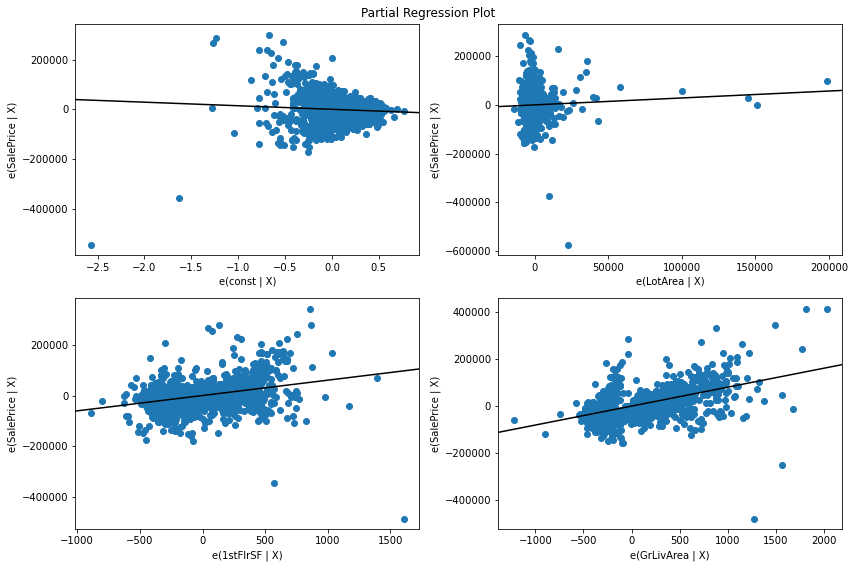

In [13]:
# Your code here - create partial regression plots for each predictor
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Fit multiple linear regression model
X = ames_subset[['LotArea', '1stFlrSF', 'GrLivArea']]
y = ames_subset['SalePrice']
model = sm.OLS(y, sm.add_constant(X)).fit()

# Create partial regression plots for each predictor
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.show()


# Your written answer here - explain what you see, and how this relates
# to what you saw in Step 1. What do you notice?
The partial regression plots in Step 4 show the relationship between each predictor variable (LotArea, 1stFlrSF, and GrLivArea) and the target variable (SalePrice), while controlling for the effects of the other predictor variables in the model.

Looking at the partial regression plots, we can see that the relationship between SalePrice and each of the predictor variables is generally linear, as we observed in Step 1. However, the partial regression plots provide a clearer view of the relationship, as they account for the effects of the other predictor variables in the model.

We can also see that the relationship between SalePrice and LotArea is the weakest among the three predictor variables, while the relationship between SalePrice and GrLivArea is the strongest. This is consistent with what we observed in Step 1, where GrLivArea had the highest correlation with SalePrice, while LotArea had the lowest correlation.

Overall, the partial regression plots provide a useful tool for visualizing the relationship between each predictor variable and the target variable, while controlling for the effects of the other predictor variables in the model. They allow us to better understand the individual contributions of each predictor variable to the model, and how they interact with each other.

## Level Up (Optional)

Re-create this model in scikit-learn, and check if you get the same R-Squared and coefficients.

In [18]:
# Your code here - import linear regression from scikit-learn and create and fit model
from sklearn.linear_model import LinearRegression

# Define X and y
X = ames_subset.drop('SalePrice', axis=1)
y = ames_subset['SalePrice']

# Create and fit model
model_sklearn = LinearRegression().fit(X, y)

# Print R-squared and coefficients
print("R-squared:", model_sklearn.score(X, y))
print("Intercept:", model_sklearn.intercept_)
print("Coefficients:", model_sklearn.coef_)


R-squared: 0.5649801771384368
Intercept: -14313.408857494418
Coefficients: [ 0.28413359 60.28664625 80.60605834]


In [22]:
import statsmodels.api as sm

X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()


In [24]:
# Your code here - compare R-Squared
from sklearn.linear_model import LinearRegression

# Define X and y
X = ames_subset.drop('SalePrice', axis=1)
y = ames_subset['SalePrice']

# Create and fit model
model_sklearn = LinearRegression().fit(X, y)

# Print R-squared and coefficients
print("R-squared:", model_sklearn.score(X, y))
print("Intercept:", model_sklearn.intercept_)
print("Coefficients:", model_sklearn.coef_)



R-squared: 0.5649801771384368
Intercept: -14313.408857494418
Coefficients: [ 0.28413359 60.28664625 80.60605834]


In [25]:
# Your code here - compare intercept and coefficients
# Intercept of StatsModels model
print("StatsModels intercept:", model_sm.params[0])
# Intercept of scikit-learn model
print("scikit-learn intercept:", model_sklearn.intercept_)

# Coefficients of StatsModels model
print("StatsModels coefficients:", model_sm.params[1:])
# Coefficients of scikit-learn model
print("scikit-learn coefficients:", model_sklearn.coef_)


StatsModels intercept: -14313.408857494347
scikit-learn intercept: -14313.408857494418
StatsModels coefficients: LotArea       0.284134
1stFlrSF     60.286646
GrLivArea    80.606058
dtype: float64
scikit-learn coefficients: [ 0.28413359 60.28664625 80.60605834]


## Summary
Congratulations! You fitted your first multiple linear regression model on the Ames Housing data using StatsModels.